---
title: "Trovare la linea meno lunga in una lista di linee"
description: "Mettiamo il caso che abbiamo una lista di linee: come troviamo quella meno lunga?"
lang: it
date: "2022 11 20"
categories: [line]
image: "images/logo.jpg"
format:
    html:
        toc: true
        code-fold: true
execute:
  enabled: false
share:
  description: "Mettiamo il caso che abbiamo una lista di linee: come troviamo quella meno lunga?"
  twitter: true
  facebook: true
  reddit: true
  stumble: true
  tumblr: true
  linkedin: true
  email: true
---

Mettiamo il caso che abbiamo una lista di linee: come troviamo quella meno lunga?


## Prima di iniziare


### Librerie
Per raggiungere l'obiettivo userò `shapely`, `matplotlib` e `random`; queste ultime due le ho usate solo per motivi di rappresentazione grafica dei dati.

In [1]:
from shapely import wkt
from matplotlib import pyplot as plt
import random

### Fonti dati
Userò in questo piccolo esercizio quattro linee, ma dobbiamo immaginarci di essere di fronte alla generica situazione in cui abbiamo una lista di *N* linee e non possiamo di certo metterci a misurarle tutte.


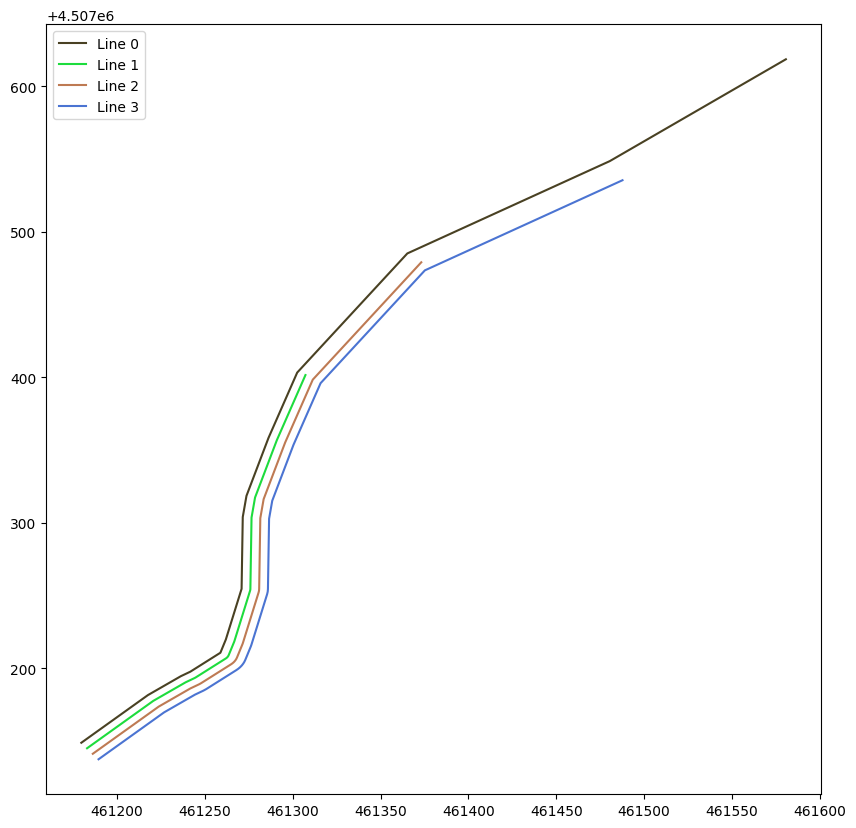

In [2]:
line_0 = wkt.loads('LINESTRING (461179.6655721677 4507148.788223281, 461217.56786209624 4507181.537033379, 461236.3280996226 4507194.537878151, 461241.7247760045 4507197.640095252, 461258.8379542616 4507210.660701941, 461261.9432857035 4507219.791508417, 461270.90091201715 4507254.590010401, 461271.56385885156 4507303.918307676, 461273.67536588735 4507318.460376316, 461286.2322009634 4507358.346460313, 461302.55653224624 4507403.197152592, 461365.2492823085 4507485.060388609, 461480.4983426857 4507548.512415529, 461580.7367309019 4507618.493483591)')
line_1 = wkt.loads('LINESTRING (461179.6655721677 4507148.788223281, 461217.56786209624 4507181.537033379, 461236.3280996226 4507194.537878151, 461241.7247760045 4507197.640095252, 461258.8379542616 4507210.660701941, 461261.9432857035 4507219.791508417, 461270.90091201715 4507254.590010401, 461271.56385885156 4507303.918307676, 461273.67536588735 4507318.460376316, 461286.2322009634 4507358.346460313, 461302.55653224624 4507403.197152592)')
line_2 = wkt.loads('LINESTRING (461179.6655721677 4507148.788223281, 461217.56786209624 4507181.537033379, 461236.3280996226 4507194.537878151, 461241.7247760045 4507197.640095252, 461258.8379542616 4507210.660701941, 461261.9432857035 4507219.791508417, 461270.90091201715 4507254.590010401, 461271.56385885156 4507303.918307676, 461273.67536588735 4507318.460376316, 461286.2322009634 4507358.346460313, 461302.55653224624 4507403.197152592, 461365.2492823085 4507485.060388609)')
line_3 = wkt.loads('LINESTRING (461179.6655721677 4507148.788223281, 461217.56786209624 4507181.537033379, 461236.3280996226 4507194.537878151, 461241.7247760045 4507197.640095252, 461258.8379542616 4507210.660701941, 461261.9432857035 4507219.791508417, 461270.90091201715 4507254.590010401, 461271.56385885156 4507303.918307676, 461273.67536588735 4507318.460376316, 461286.2322009634 4507358.346460313, 461302.55653224624 4507403.197152592, 461365.2492823085 4507485.060388609, 461480.4983426857 4507548.512415529)')

line_list = [line_0, line_1, line_2, line_3]

fig, ax = plt.subplots(figsize=(10, 10))

for position in range(len(line_list)):
    distance = position * 5
    color = f'{"%06x" % random.randint(0, 0xFFFFFF)}'
    plt.plot(*line_list[position].parallel_offset(distance=distance).xy, label=f'Line {position}', color=f'#{color}')

    plt.legend()

**NB**: ho usato *[parallel_offset](https://shapely.readthedocs.io/en/stable/manual.html#object.parallel_offset)* solo per motivi grafici. Le linee che ho usato in questo esercizio sono pezzi di una unica linea più lunga che rappresentati sarebbero andati in sovrapposizione nel grafico rendendo impossibile la loro visualizzazione.

# Misurare!
Se avessimo solo quattro linee in una lista sarebbe abbastanza semplice capire quale è quella meno lunga:

In [3]:
line_measure = [line_0.length, line_1.length, line_2.length, line_3.length]
line_measure

[656.716578077637, 299.7932485603402, 402.9046946828671, 534.4664886738693]

Usando l'attributo **[length](https://shapely.readthedocs.io/en/stable/manual.html#object.length)** risulta abbastanza immediato capire che la linea più breve è quella in posizione 1 che nemmeno a farlo apposta è `line_1`. Ma vediamo come possiamo risolvere il caso più generico.

In [4]:
line_list.sort(key=lambda x: x.length, reverse=False)
line_list

Proprio usando `length` ho raggiunto lo scopo di questo piccolo articolo. Ho riordinato la lista di linee usando la **[lambda function](https://www.w3schools.com/python/python_lambda.asp)** in accoppiata con l'attributo visto in precedenza.

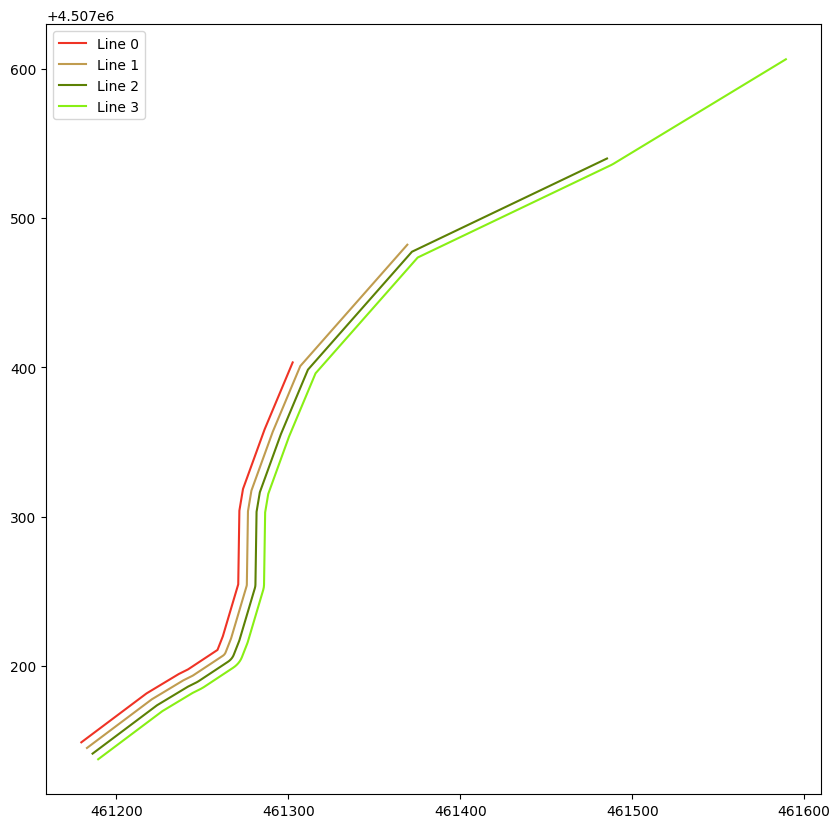

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

for position in range(len(line_list)):
    distance = position * 5
    color = f'{"%06x" % random.randint(0, 0xFFFFFF)}'
    plt.plot(*line_list[position].parallel_offset(distance=distance).xy, label=f'Line {position}', color=f'#{color}')

    plt.legend()

In [6]:
smallest_line = line_list[0]
smallest_line.wkt

'LINESTRING (461179.6655721677 4507148.788223281, 461217.56786209624 4507181.537033379, 461236.3280996226 4507194.537878151, 461241.7247760045 4507197.640095252, 461258.8379542616 4507210.660701941, 461261.9432857035 4507219.791508417, 461270.90091201715 4507254.590010401, 461271.56385885156 4507303.918307676, 461273.67536588735 4507318.460376316, 461286.2322009634 4507358.346460313, 461302.55653224624 4507403.197152592)'

# Conclusione

Ora noi sappiamo che è la linea in posizione 0, della nuova lista riordinata, ad essere quella meno lunga. Se ne conosci altri, o se hai indicazioni da dare per migliorare il post, fallo scrivendo in [Discussioni](https://github.com/MaxDragonheart/PyGIS-Blog/discussions).

## Newsletter

Se vuoi ricevere aggiornamenti sui prossimi articoli [iscriviti alla newsletter](https://massimilianomoraca.it/newsletter/)!

## Telegram

Segui il canale Telegram **[CaffèGIS -  I GIS a supporto dei processi evolutivi territoriali](https://t.me/caffegis)** per ricevere aggiornamenti su iniziative ed informazioni a tema GIS.

## Offrimi una birra!

**Se trovi interessanti i miei articoli [offrimi una birra](https://www.paypal.com/paypalme/MassimilianoMoraca)!**

Alla prossima!